# Business Problem

# 0.0. Imports

In [21]:
import random

import numpy   as np
import pandas  as pd
import seaborn as sns

from keras      import layers          as l
from keras      import models          as ml
from sklearn    import metrics         as m
from sklearn    import preprocessing   as pp
from sklearn    import model_selection as ms
from scikitplot import metrics         as mt

## 0.1. Helper Functions

## 0.2. Loading Data

In [3]:
path = '/home/felipe/repos/ds_em_classificacao/'
df_raw = pd.read_csv(path + 'datasets/data_raw/training_users.csv', low_memory=True)
df_sessions = pd.read_csv(path + 'datasets/data_raw/sessions.csv', low_memory=True)

# 1.0. Data Description

In [4]:
df1 = df_raw.copy()

## 1.1. Dataset Dimensions

In [5]:
print('Users Dataset')
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Users Dataset
Number of rows: 213451
Number of columns: 16


In [6]:
print('Sessions Dataset')
print('Number of rows: {}'.format(df_sessions.shape[0]))
print('Number of columns: {}'.format(df_sessions.shape[1]))

Sessions Dataset
Number of rows: 10567737
Number of columns: 6


## 1.2. Check NAs

In [40]:
# users dataset NAs
df1.isna().sum()/len(df1)

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

In [39]:
# sessions dataset NAs
df_sessions.isna().sum()/len(df_sessions)

user_id          0.0
action           0.0
action_type      0.0
action_detail    0.0
device_type      0.0
secs_elapsed     0.0
dtype: float64

### 1.2.1. Replace NAs

In [34]:
# # investigate date_first_booking
# aux = df1[df1['date_first_booking'].isna()]
# aux['country_destination'].value_counts(normalize=True)

# # investigate age
# aux = df1[df1['age'].isna()]
# aux['country_destination'].value_counts(normalize=True)
# sns.histplot(data=df1[df1['age']<65], x='age', kde=True);

# # investigate first_affiliate_tracked
# df1['first_affiliate_tracked'].drop_duplicates()

In [38]:
#====================== USERS ================================

# date_first_booking - people with NDF as country_destination
date_first_booking_max = pd.to_datetime(df1['date_first_booking']).max().strftime('%Y-%m-%d')
df1['date_first_booking'] = df1['date_first_booking'].fillna(date_first_booking_max)

# age - distribution similar to normal distribution
avg_age = df1['age'].mean().astype(int)
df1['age'] = df1['age'].fillna(avg_age)

# first_affiliate_tracked - categorical attribute, hard to replace without bias
df1 = df1[~df1['first_affiliate_tracked'].isna()]

#====================== SESSIONS ================================
# user_id - 0.3%
df_sessions = df_sessions[~df_sessions['user_id'].isna()]

# action - 0.7%
df_sessions = df_sessions[~df_sessions['action'].isna()]

# action_type - 11%
df_sessions = df_sessions[~df_sessions['action_type'].isna()]

# action_detail - 11%
df_sessions = df_sessions[~df_sessions['action_detail'].isna()]

# secs_elapsed - 1.2%
df_sessions = df_sessions[~df_sessions['secs_elapsed'].isna()]

## 1.3. Check DTypes

In [7]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
df1.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


### 1.3.1. Change DTypes

In [9]:
# date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking 
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype('int')

## 1.4. Check Balanced Data

In [10]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Data Filtering

In [11]:
df2 = df1.copy()

In [12]:
# check in next cycle

# 3.0. Data Preparation

In [13]:
df3 = df2.copy()

In [14]:
# dummy variables
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))

# join id and country destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

In [15]:
# check in next cycle

# 4.0. Feature Selection

In [16]:
# drop columns
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df4 = df3.drop(cols_drop, axis=1)

In [17]:
# split dataset into features and target
X = df4.drop('country_destination', axis=1)
y = df4['country_destination']

In [18]:
# split dataset into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

# 5.0. Machine Learning Model

In [19]:
# drop id
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

## 5.1. Baseline Model

In [20]:
country_dest_list = df4['country_destination'].drop_duplicates().sort_values().tolist()
country_dest_weights = df4['country_destination'].value_counts(normalize=True).sort_index().tolist()
k_num = y_test.shape[0]

# random model
yhat_random = random.choices(population=country_dest_list, 
                             weights=country_dest_weights,
                             k=k_num)

Accurary: 0.5267
Balanced Accurary: 0.0915
Kappa Score: 0.0010
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        90
          CA       0.02      0.02      0.02       210
          DE       0.00      0.00      0.00       176
          ES       0.03      0.03      0.03       344
          FR       0.08      0.07      0.08       742
          GB       0.03      0.03      0.03       356
          IT       0.03      0.03      0.03       399
          NL       0.01      0.01      0.01       107
          PT       0.00      0.00      0.00        26
          US       0.71      0.72      0.71      9704
       other       0.10      0.10      0.10      1481

    accuracy                           0.53     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.53      0.53     13635



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

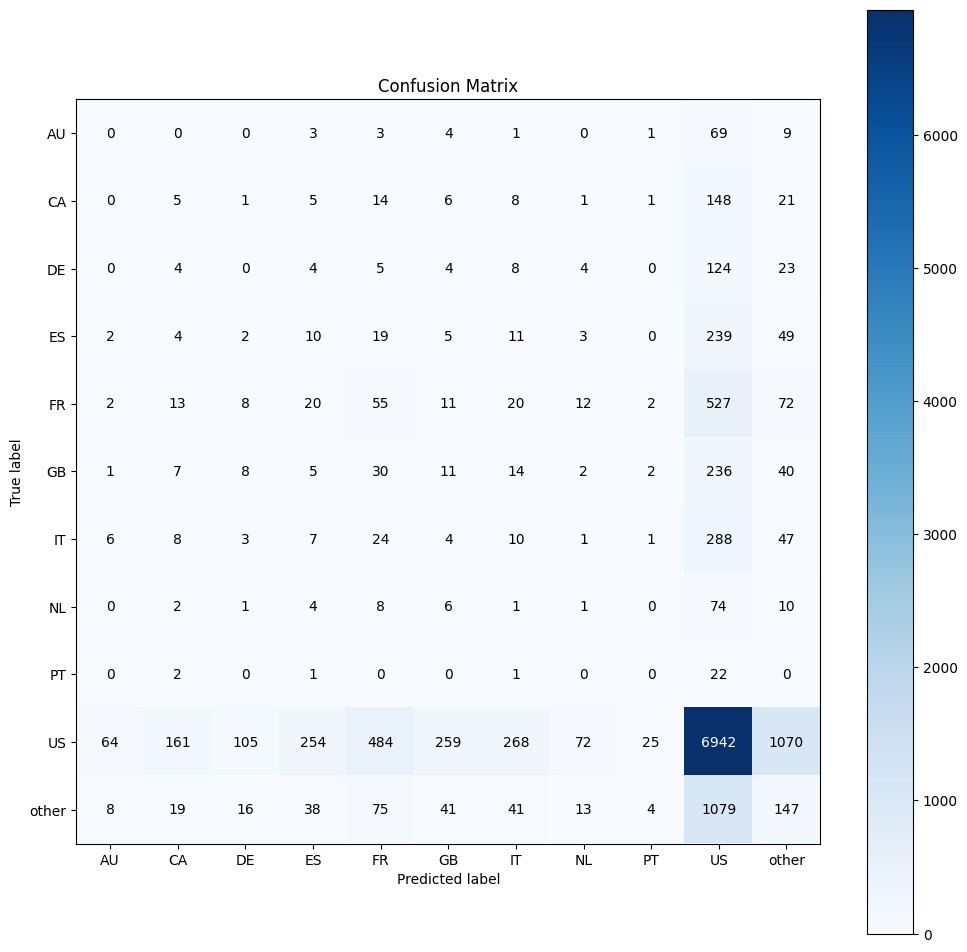

In [21]:
# accuracy
acc_random = m.accuracy_score(y_test, yhat_random)
print('Accurary: {:.4f}'.format(acc_random))

# balanced accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print('Balanced Accurary: {:.4f}'.format(balanced_acc_random))

# kappa score
kappa_random = m.cohen_kappa_score(y_test, yhat_random)
print('Kappa Score: {:.4f}'.format(kappa_random))

# classification report
print(m.classification_report(y_test, yhat_random))

# confusion matrix
mt.plot_confusion_matrix(y_test, yhat_random, normalize=False, figsize=(12, 12))

## 5.2. Neural Network - MLP

In [22]:
# transform y_train in dummy to use in the neural network
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [23]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

2023-02-12 14:01:29.421062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-12 14:01:29.427662: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-12 14:01:29.427695: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: q550lf
2023-02-12 14:01:29.427702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: q550lf
2023-02-12 14:01:29.427803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-02-12 14:01:29.427838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-02-12 14:01:29

Epoch 1/100
1705/1705 [==============================] - 5s 2ms/step - loss: 1.3438 - accuracy: 0.7023
Epoch 2/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2767 - accuracy: 0.7057
Epoch 3/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2390 - accuracy: 0.7068
Epoch 4/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.2122 - accuracy: 0.7067
Epoch 5/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1875 - accuracy: 0.7070
Epoch 6/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1775 - accuracy: 0.7070
Epoch 7/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1613 - accuracy: 0.7071
Epoch 8/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1510 - accuracy: 0.7073
Epoch 9/100
1705/1705 [==============================] - 3s 2ms/step - loss: 1.1456 - accuracy: 0.7075
Epoch 10/100
1705/1705 [==============================] - 3s 2ms/step - l

1705/1705 [==============================] - 4s 2ms/step - loss: 1.1040 - accuracy: 0.7103
Epoch 80/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1038 - accuracy: 0.7099
Epoch 81/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1038 - accuracy: 0.7100
Epoch 82/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1031 - accuracy: 0.7102
Epoch 83/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1028 - accuracy: 0.7103
Epoch 84/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1027 - accuracy: 0.7101
Epoch 85/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1025 - accuracy: 0.7103
Epoch 86/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1024 - accuracy: 0.7102
Epoch 87/100
1705/1705 [==============================] - 4s 2ms/step - loss: 1.1020 - accuracy: 0.7104
Epoch 88/100
1705/1705 [==============================] - 4s 3ms/step - loss:

### 5.2.3. NN Performance

In [24]:
# prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

427/427 [==============================] - 1s 1ms/step


Accurary: 0.7104
Balanced Accurary: 0.0914
Kappa Score: 0.0013


/home/felipe/repos/ds_em_classificacao/airbnb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felipe/repos/ds_em_classificacao/airbnb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/felipe/repos/ds_em_classificacao/airbnb_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00        90
          CA       0.00      0.00      0.00       210
          DE       0.00      0.00      0.00       176
          ES       0.33      0.00      0.01       344
          FR       0.25      0.00      0.00       742
          GB       0.00      0.00      0.00       356
          IT       0.00      0.00      0.00       399
          NL       0.00      0.00      0.00       107
          PT       0.00      0.00      0.00        26
          US       0.71      1.00      0.83      9704
       other       0.21      0.00      0.01      1481

    accuracy                           0.71     13635
   macro avg       0.14      0.09      0.08     13635
weighted avg       0.55      0.71      0.59     13635



<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

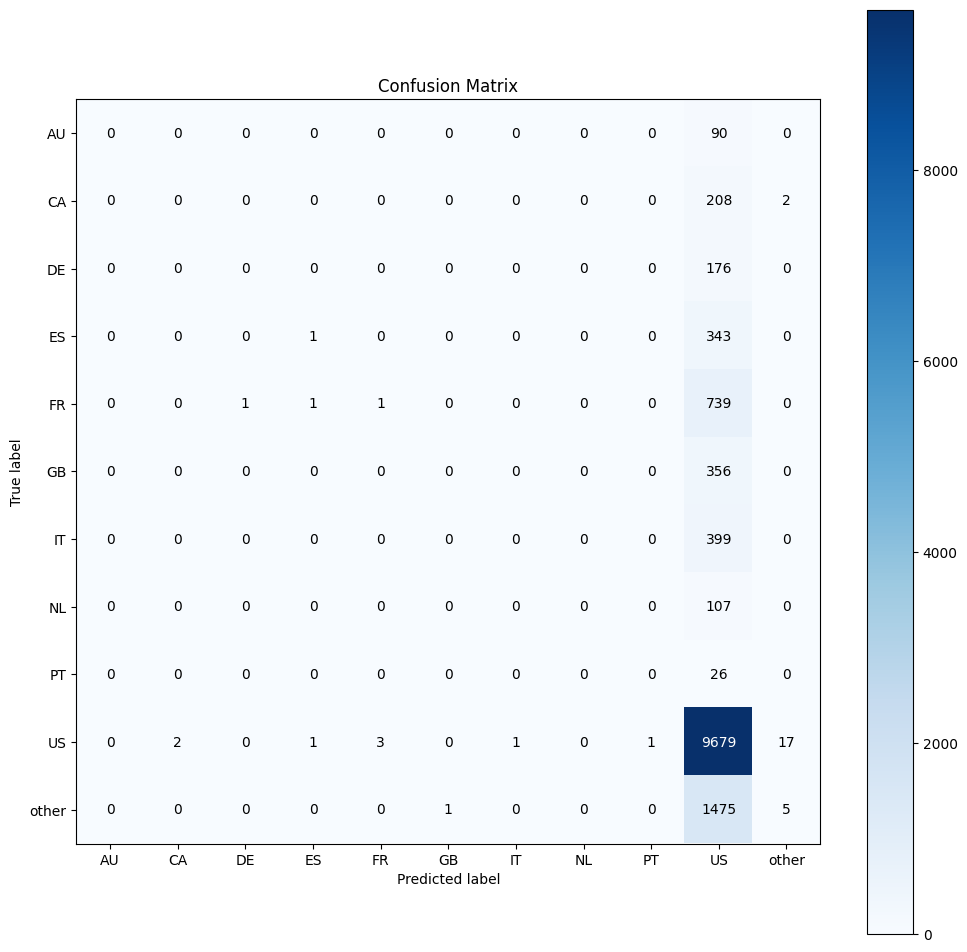

In [25]:
# accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accurary: {:.4f}'.format(acc_nn))

# balanced accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print('Balanced Accurary: {:.4f}'.format(balanced_acc_nn))

# kappa score
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print('Kappa Score: {:.4f}'.format(kappa_nn))

# classification report
print(m.classification_report(y_test_nn, yhat_nn))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12, 12))


# 6.0. CROSS VALIDATION

## 6.1. NN Cros Validation

In [62]:
# generate k-fold
num_fold = 5
kfold = ms.StratifiedKFold(n_splits=num_fold, shuffle=True, random_state=32)

balanced_acc_list = []
kappa_list = []
metrics = []

i = 1

for train_ix, val_ix in kfold.split(x_train, y_train):
    # fold number
    print('Fold Number: {}/{}'.format(i, num_fold))
    # get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]

    # target hot-encoding
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1, 1)).toarray()

    # model definition
    model = ml.Sequential()
    model.add(l.Dense(256, input_dim=x_train.shape[1], activation='relu'))
    model.add(l.Dense(11, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # training model
    model.fit(x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=0)
    
    # prediction
    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform(pred_nn)
    
    # prepare data
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape(1, -1)[0]
    
    # metrics
    ## balanced accuracy
    balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_list.append(balanced_acc_nn)
    
    ## Kappa score
    kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
    kappa_list.append(kappa_nn)
    
    metrics.append([i, balanced_acc_nn, kappa_nn])
    
    i += 1

Fold Number: 1/5
341/341 [==============================] - 0s 1ms/step
Fold Number: 2/5


KeyboardInterrupt: 

In [50]:
print('Avg Balanced Accuracy: {} +/- {}'.format(np.mean(balanced_acc_list), np.std(balanced_acc_list)))
print('Avg Kappa: {} +/- {}'. format(np.mean(kappa_list), np.std(kappa_list)))